## Ideas ##


In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### artificial 16-QAM ###

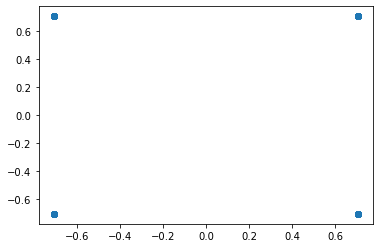

In [2]:
# erster Modulator
A = np.exp(1j*rng.integers(4, size=1000)*np.pi/2+1j*np.pi/4)
plt.scatter(np.real(A),np.imag(A))

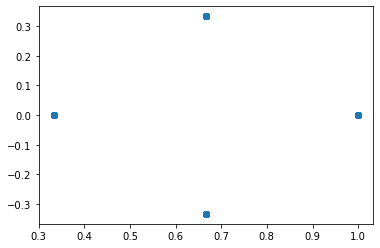

In [3]:
#zweiter Modulator: offset damit neues Symbol in der Nähe des ursprünglichen Symbols liegt
a=1/3
B = (1-a) + a*np.exp(1j*np.pi/2*rng.integers(4, size=1000))
B1 = 2/3 + 1/3*np.exp(1j*np.pi/2*0)
B2 = 2/3 + 1/3*np.exp(1j*np.pi/2*1)
B3 = 2/3 + 1/3*np.exp(1j*np.pi/2*2)
B4 = 2/3 + 1/3*np.exp(1j*np.pi/2*3)
plt.scatter(np.real(B),np.imag(B))

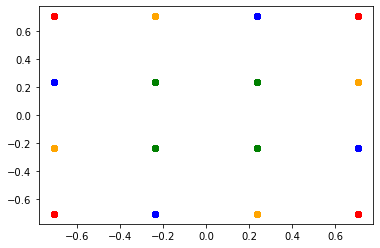

In [4]:
#Überlagerung
C=A*B
#plt.scatter(np.real(C),np.imag(C))
plt.scatter(np.real(A*B1),np.imag(A*B1),color='r')
plt.scatter(np.real(A*B2),np.imag(A*B2),color='b')
plt.scatter(np.real(A*B3),np.imag(A*B3),color='g')
plt.scatter(np.real(A*B4),np.imag(A*B4),color='orange')

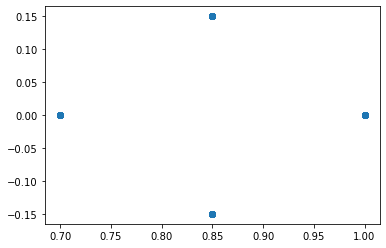

In [5]:
# mehr überlagerung
a=0.15
Bx = (1-a) + a*np.exp(1j*np.pi/2*rng.integers(4, size=1000))
plt.scatter(np.real(Bx),np.imag(Bx))

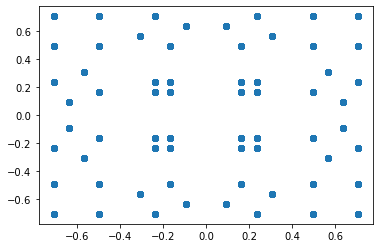

In [6]:
Cx=C*Bx
plt.scatter(np.real(Cx),np.imag(Cx))
# nur bedingt über 2 User hochskalierbar

## Mathematical reduction to addition ##

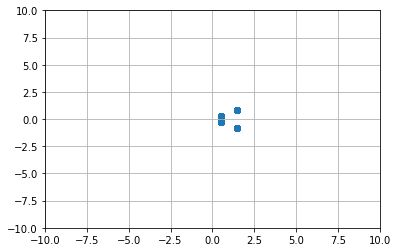

In [7]:
# ln(a*b)=ln(a)+ln(b) and complex logarithm: ln(a*exp(jb))=ln(a)+jb
ar=0.5
ai=0.5
Cr=2*rng.integers(0,2,1000)-1
Ci=2*rng.integers(0,2,1000)-1

Mlog=np.exp(ar*Cr+1j*ai*Ci)
plt.scatter(np.real(Mlog),np.imag(Mlog))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

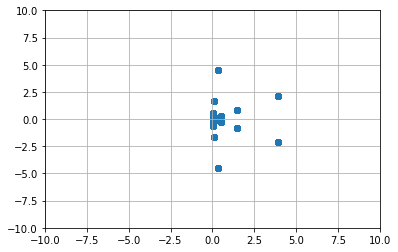

In [8]:
ar2=1
ai2=1
Cr2=2*rng.integers(0,2,1000)-1
Ci2=2*rng.integers(0,2,1000)-1

Mg=np.exp(ar2*Cr2+1j*ai2*Ci2)

Mall=Mg*Mlog
plt.scatter(np.real(Mall),np.imag(Mall))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

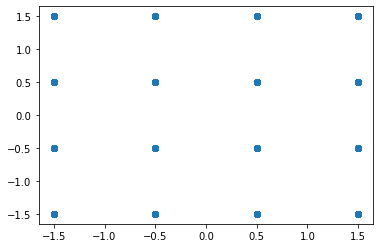

In [9]:
plt.scatter(np.log(np.abs(Mall)),np.angle(Mall))

very low error resilience, high peak power

### PSK +ASK ###

+ Synchonisierung ist egal
- nicht weiter skalierbar
- nicht unendlich effizient

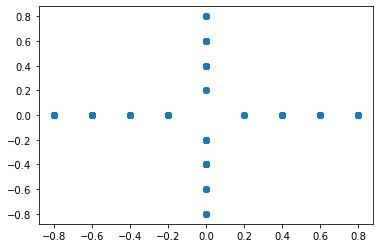

In [10]:
C1=0.2*rng.integers(1,5,100)
C2=np.exp(1j*rng.integers(0,4,100)*np.pi/2)
plt.scatter(np.real(C1*C2),np.imag(C1*C2))

low spectral efficiency, 

### Phase addition ###

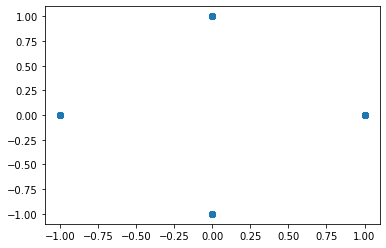

In [11]:
w1 = np.exp(1j*rng.integers(4, size=100)*np.pi/2)
plt.scatter(np.real(w1),np.imag(w1))

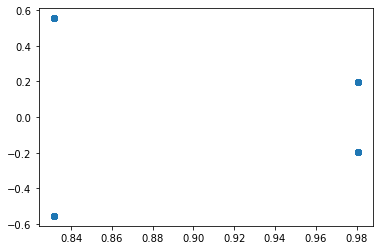

In [12]:
w2 = np.exp(1j*rng.integers(4, size=100)*np.pi/8-1j*np.pi*3/16)
wx = np.exp(1j*2*np.pi/8-1j*np.pi*3/16)
plt.scatter(np.real(w2),np.imag(w2))

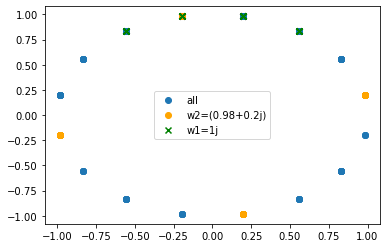

In [13]:
plt.scatter(np.real(w1*w2),np.imag(w1*w2),label='all')
plt.scatter(np.real(w1*wx),np.imag(w1*wx),color='orange', label='w2='+str(np.round(wx,2)))
plt.scatter(np.real(1j*w2),np.imag(1j*w2),marker='x',color='g', label='w1=1j')
plt.legend()

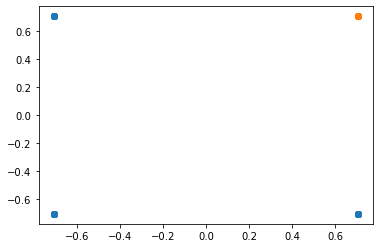

In [14]:
## demod w1: decision regions 
## demod w2:
W=(w1*w2)**4
Wx=(w1*wx)**4
plt.scatter(np.real(W),np.imag(W))
plt.scatter(np.real(Wx),np.imag(Wx))

theoretisch gut mit weiteren Usern skalierbar, nur mit MZM durchführbar

## Komplexe Primzahlen: Gaussian Primes ##

In [15]:
#eisenstein prime numbers
eisdict = {
  1: 2,
  2: 1+np.exp(1j*np.pi/3),
  3: 2+np.exp(1j*np.pi/3),
  4: 1+2*np.exp(1j*np.pi/3) 
}

T1 = np.zeros(100,complex)
T2 = np.zeros(100,complex)
E1 = rng.integers(1,5, size=100)
E2 = rng.integers(1,5, size=100)
for e in range(np.size(E)):
    T1[e]=eisdict[E1[e]]
    T2[e]=eisdict[E2[e]]

plt.scatter(np.real(T1),np.imag(T1))
plt.grid()
plt.xlim(0,3)
plt.ylim(0,3)

NameError: name 'E' is not defined

In [ ]:
T2=T2*np.exp(1j*np.pi/3)
plt.scatter(np.real(T1*T2),np.imag(T1*T2))
plt.scatter(np.real(T1*2*np.exp(1j*np.pi/3)),np.imag(T1*2*np.exp(1j*np.pi/3)),color='red')
#plt.scatter(np.real(T1*(1+np.exp(1j*np.pi/3))*np.exp(1j*np.pi/3)),np.imag(T1*(1+np.exp(1j*np.pi/3))*np.exp(1j*np.pi/3)),color='g')
#plt.scatter(np.real(T1*2),np.imag(T1*2),color='k')
#plt.scatter(np.real(T1*2),np.imag(T1*2),color='orange')

plt.grid()

In [ ]:
#Gaussian primes
G1=np.matrix([1+1j,1-1j,-1+1j,-1-1j])
G2=np.matrix([1+1j,1+2j, 2+1j,3])
G3=np.matrix([1+1j,3+2j,2+3j,1+4j]) # one number can occur multiple times

x=np.asarray(np.matrix.flatten(np.transpose(G1)*G2))
print(x)

plt.scatter(np.real(x),np.imag(x))

In [ ]:
v=np.matrix.flatten(np.transpose(np.matrix.flatten(np.transpose(G1)*G2))*G3)
v=np.asarray(v)
print(v)
print(np.sort(v))
plt.scatter(np.real(v),np.imag(v))

## Phase CDMA ##

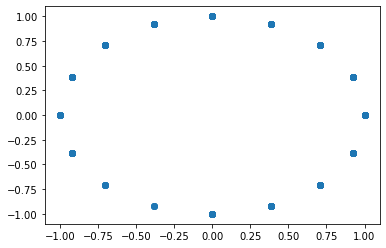

In [53]:
# multiplication == phase addition:
t=np.arange(4)

c1=[1,1,1,1]
c2=[1,1,-1,-1]
c3=[1,-1,-1,1]
c4=[1,-1,1,-1]

p1=rng.integers(0,4,100)
p2=rng.integers(0,4,100)
p3=rng.integers(0,4,100)
p4=rng.integers(0,4,100)

y=np.zeros(400,complex)
for info in range(100):
    for tsig in t:
        y[4*info+tsig]=np.exp(1j*np.pi*0.125*p1[info]*c1[tsig])*np.exp(1j*np.pi*0.125*p2[info]*c2[tsig])*np.exp(1j*np.pi*0.125*p3[info]*c3[tsig])*np.exp(1j*np.pi*0.125*p4[info]*c4[tsig])
    
        
plt.scatter(np.real(y),np.imag(y))


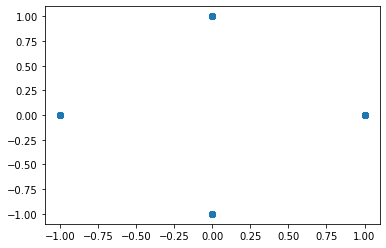

In [54]:
yr=np.reshape(y,(100,4))
e1=np.zeros(100,complex)
e2=np.zeros(100,complex)
e3=np.zeros(100,complex)
e4=np.zeros(100,complex)

for info in range(100):
    e1[info]=yr[info,0]*yr[info,1]*yr[info,2]*yr[info,3]
    e2[info]=yr[info,0]*yr[info,1]/yr[info,2]/yr[info,3]
    e3[info]=yr[info,0]/yr[info,1]/yr[info,2]*yr[info,3]
    e4[info]=yr[info,0]/yr[info,1]*yr[info,2]/yr[info,3]

plt.scatter(np.real(e1),np.imag(e1))

In [55]:
# wenn cdma schonmal funktioniert, wie wärs mit code domain NOMA?